<a href="https://colab.research.google.com/github/prodonn/public/blob/main/preliminary_observations_cortx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install boto3

     |████████████████████████████████| 131 kB 7.7 MB/s 
     |████████████████████████████████| 8.4 MB 41.4 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 138 kB 58.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import boto3
import logging
import time
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [ ]:
AWSAccessKeyId='XXX'
AWSSecretKey='xxx'
region='eu-west-3'

print(logger)

session = boto3.Session(
    aws_access_key_id=AWSAccessKeyId,
    aws_secret_access_key=AWSSecretKey,
    region_name=region
)
s3 = session.resource('s3')


<Logger __main__ (WARNING)>


In [ ]:
#s3 = boto3.resource('s3')
#bucket_name = 'recrutementdatascience'
bucket_name = 'recrutementdatascience'
result = s3.meta.client.head_bucket(Bucket=bucket_name)

In [ ]:
bucket = s3.Bucket(bucket_name)

for obj in bucket.objects.all():
    print(obj.key)

_metadata
jointure_milling_vibrations_C.py
milling_modes.csv
output/
output_consolidate/_SUCCESS
output_consolidate/part-00000-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00001-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00002-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00003-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00004-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00005-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00006-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00007-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00008-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00009-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00010-93dbae99-cbf1-489c-a742-c651e52f9b24-c000.csv
output_consolidate/part-00011-93dbae99-cbf1-489c-a742-c651e52f9b24-

In [ ]:
# time taken to read data
s_time_0 = time.time()
vib_AB_df=pd.read_csv(bucket.Object('vibration_axis_A_axis_B.csv').get()['Body'], index_col=0).sort_index(ascending=True)

vib_C_df=pd.read_csv(bucket.Object('vibration_axis_C.csv').get()['Body'], index_col=0).sort_index(ascending=True)

vib_D_df=pd.read_csv(bucket.Object('vibration_axis_D.csv').get()['Body'], index_col=0).sort_index(ascending=True)

prog_mode_df=pd.read_csv(bucket.Object('milling_modes.csv').get()['Body'], index_col=0).sort_index(ascending=True)

# time taken to read data
print(f"duree : {time.time() - s_time_0}")

duree : 9.076740264892578


In [ ]:
l_dataframes = [['vibration_AB', vib_AB_df], ['vibration_C',vib_C_df], ['vibration_D',vib_D_df], ['milling_mode', prog_mode_df]]

for df in l_dataframes :
  print("*"*20)
  print(f'Data : {df[0]}')
  print("HEAD")
  print(df[1].head(5))
  print()
  print("TAIL")
  print(df[1].tail(5))
  print(" ")

********************
Data : vibration_AB
HEAD
                             values1   values2
2018-10-20 03:46:40.000000  0.499796 -0.423251
2018-10-20 03:46:40.000050 -0.304905 -0.450489
2018-10-20 03:46:40.000100  0.134838 -0.227736
2018-10-20 03:46:40.000150  1.191718 -0.476670
2018-10-20 03:46:40.000200 -0.050930 -0.094205

TAIL
                             values1   values2
2018-10-23 13:26:40.999750  0.513869 -0.635361
2018-10-23 13:26:40.999800 -0.255744 -0.605797
2018-10-23 13:26:40.999850  1.368616 -0.344009
2018-10-23 13:26:40.999900 -0.497757 -0.167307
2018-10-23 13:26:40.999950 -0.242097 -0.285312
 
********************
Data : vibration_C
HEAD
                      values3
2018-10-20 03:46:40  0.516930
2018-10-20 03:47:40 -0.252103
2018-10-20 03:48:40  0.716733
2018-10-20 03:49:40  0.582523
2018-10-20 03:50:40  0.274914

TAIL
                      values3
2019-10-20 03:41:40 -0.668435
2019-10-20 03:42:40  1.120583
2019-10-20 03:43:40  1.104337
2019-10-20 03:44:40 -0.801653
2

# Recherche des outliers

In [ ]:
class Vib :
    def __init__(self, data):
        self.vibration = data

    def dist_draw(self) :
      plt.figure(figsize=(15,10))
      plt.subplot(2,2,1)
      sns.histplot(self.vibration,kde=True)

    def plot_box(self) :
      plt.figure(figsize=(10,5))
      sns.boxplot(x=self.vibration)

    def detect_outliers(self) :
       # find q1 and q3 values
       q1, q3 = np.percentile(sorted(self.vibration), [25, 75])
 
       # compute IRQ
       iqr = q3 - q1
 
       # find lower and upper bounds
       lower_bound = q1 - (1.5 * iqr)
       upper_bound = q3 + (1.5 * iqr)
 
       outliers = [(i,x) for i, x in enumerate(self.vibration) if x <= lower_bound or x >= upper_bound]
       return outliers

******************************
vibration value 1
Distribution des valeurs
Observation des outliers
Detection d outliers
Il y a 0 dans l échantillon
******************************
vibration value 2
Distribution des valeurs
Observation des outliers
Detection d outliers
Il y a 0 dans l échantillon
******************************
vibration value 3
Distribution des valeurs
Observation des outliers
Detection d outliers
Il y a 0 dans l échantillon
******************************
vibration value 4
Distribution des valeurs
Observation des outliers
Detection d outliers
Il y a 0 dans l échantillon


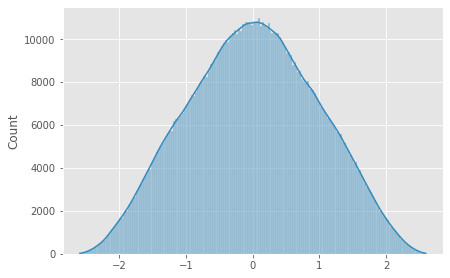

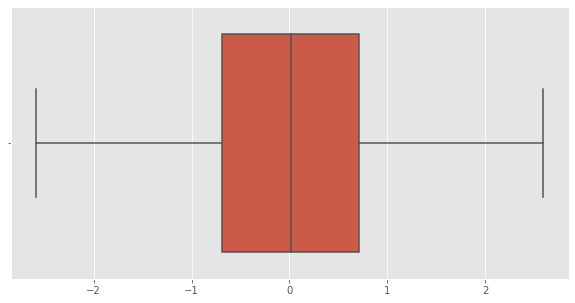

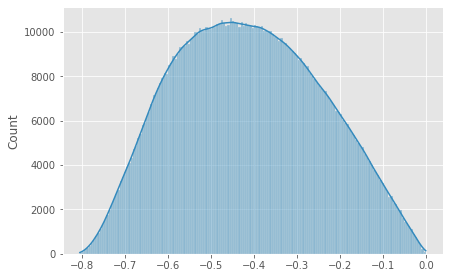

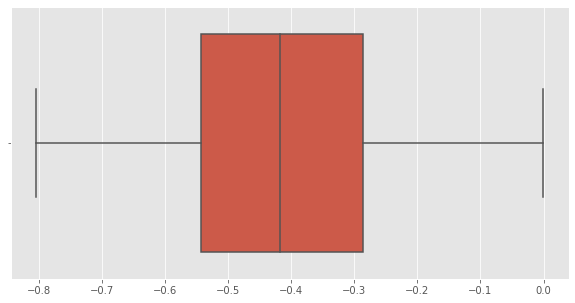

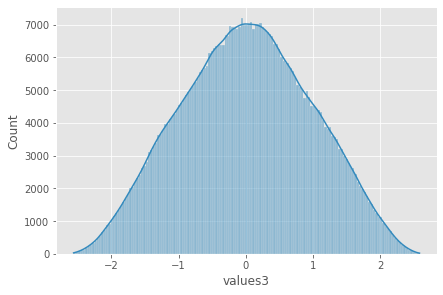

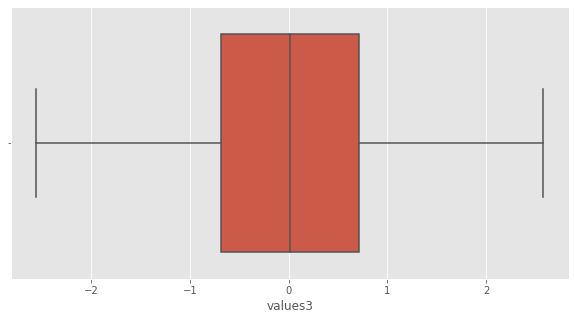

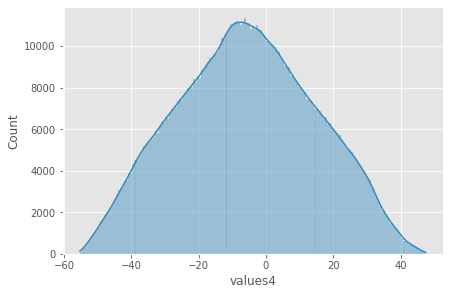

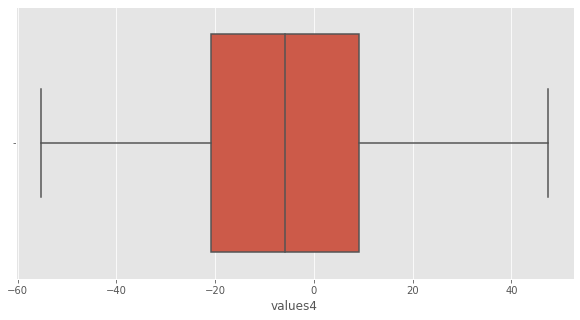

In [ ]:
l_vib = [vib_AB_df['values1'].to_list(), vib_AB_df['values2'].to_list(), vib_C_df['values3'].to_list(), vib_D_df['values4'].to_list()]

for i, vib in enumerate(l_vib) :
  vibration = Vib(vib)
  print('*'*30)
  print(f'vibration value {i+1}')

  print('Distribution des valeurs')
  vibration.dist_draw()

  print('Observation des outliers')
  vibration.plot_box()

  print('Detection d outliers')
  print(f'Il y a {len(vibration.detect_outliers())} outliers dans l échantillon')